# Pymaceuticals Inc.
---

### Analysis

- For the mice in the Capomulin regimen, there is a strong positive correlation between average tumor volume and mouse weight, where as the mouse weight increases, the average tumor volume increases as well. 

- For mouse j119, the tumor volume ended lower than it began. It was not a steady decrease, meaning the volume went up and down a couple times, but at the end it was much decreased. 

- The final Tumor Volume of the Capomulin and Ramicane regimens are much lower than the Infubinol and Ceftamin regimens.
 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_results = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice.
number_of_mice = len(combined_results["Mouse ID"].unique())
number_of_mice

249

In [43]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_results[combined_results.duplicated(["Mouse ID", "Timepoint"])]
duplicate_data["Mouse ID"].unique()

array(['g989'], dtype=object)

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_results[combined_results["Mouse ID"] !="g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = len(clean_data["Mouse ID"].unique())
clean_number_of_mice

248

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen = clean_data["Drug Regimen"].unique
drug_regimen_mean = clean_data.groupby(["Drug Regimen"]).mean()
drug_regimen_median = clean_data.groupby(["Drug Regimen"]).median()
drug_regimen_variance = clean_data.groupby(["Drug Regimen"]).var()
drug_regimen_std_dev = clean_data.groupby(["Drug Regimen"]).std()
drug_regimen_sem = clean_data.groupby(["Drug Regimen"]).sem()

tumor_mean = drug_regimen_mean["Tumor Volume (mm3)"]
tumor_median = drug_regimen_median["Tumor Volume (mm3)"]
tumor_variance = drug_regimen_variance["Tumor Volume (mm3)"]
tumor_std_dev = drug_regimen_std_dev["Tumor Volume (mm3)"]
tumor_sem = drug_regimen_sem["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean Tumor Volume" : tumor_mean,
                           "Median Tumor Volume" : tumor_median,
                           "Tumor Volume Variance" : tumor_variance,
                           "Tumor Volume Std. Dev." : tumor_std_dev,
                           "Tumor Volume Std. Err." : tumor_sem})
summary_df

C:\Users\rebek\AppData\Local\Temp\ipykernel_24720\2143762970.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_regimen_mean = clean_data.groupby(["Drug Regimen"]).mean()
C:\Users\rebek\AppData\Local\Temp\ipykernel_24720\2143762970.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_regimen_median = clean_data.groupby(["Drug Regimen"]).median()
C:\Users\rebek\AppData\Local\Temp\ipykernel_24720\2143762970.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select onl

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

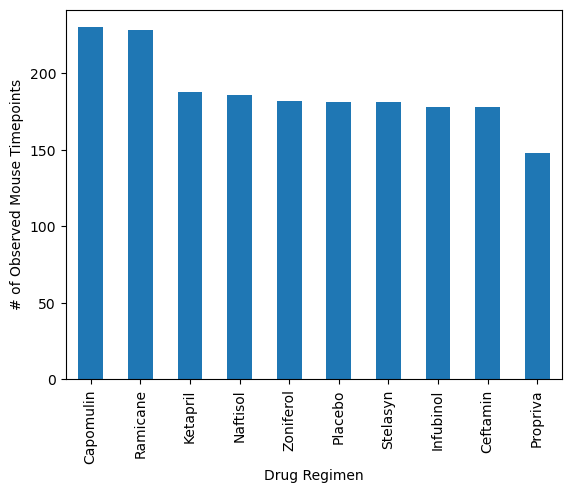

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_data["Drug Regimen"].value_counts().plot(kind = 'bar', xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

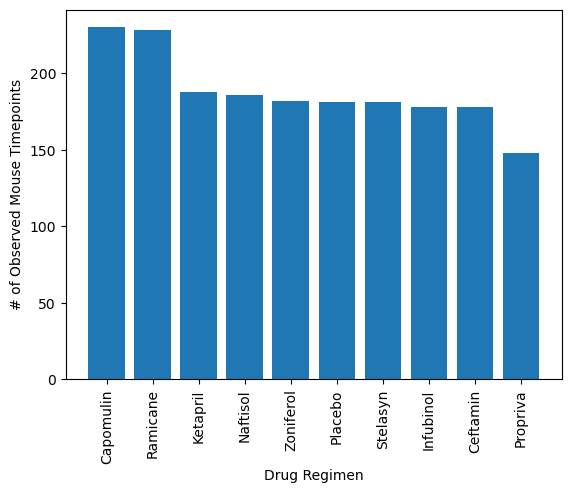

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot = plt.bar(clean_data["Drug Regimen"].value_counts().index.values,
                 clean_data["Drug Regimen"].value_counts().values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)

<Axes: ylabel='Sex'>

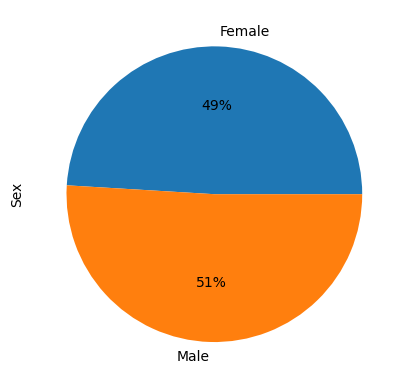

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
number_of_mice = clean_data.groupby(["Sex"]).count()["Mouse ID"]
number_of_mice.plot(kind = 'pie', ylabel = 'Sex', autopct = '%1.0f%%')

([<matplotlib.patches.Wedge at 0x2132ea14970>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

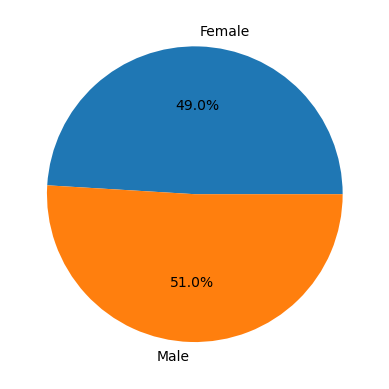

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_values = number_of_mice.values
mouse_index = number_of_mice.index.values

plt.pie(mouse_values, labels = mouse_index, autopct = "%1.1f%%")

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_point = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
last_time_point = last_time_point.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = last_time_point.merge(clean_data, on = ["Mouse ID", "Timepoint"], how = "left")
tumor_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [54]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
for drug in treatments:
    drug_regimen = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume_data.append(drug_regimen)
    quartiles = drug_regimen.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_occupancy = drug_regimen.loc[(drug_regimen < lower_bound) | (drug_regimen > upper_bound)]
    print(f"{drug} potential outliers: {outlier_occupancy}")
   


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\rebek\AppData\Local\Temp\ipykernel_24720\486087304.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axl.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


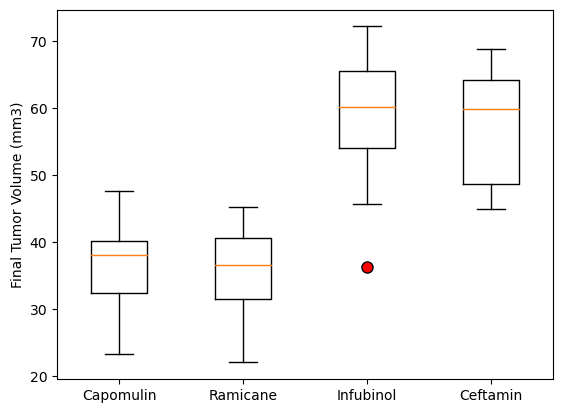

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
figl, axl = plt.subplots()
flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 8,
                  linestyle='none')
axl.set_ylabel("Final Tumor Volume (mm3)")
axl.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
axl.boxplot(tumor_volume_data, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

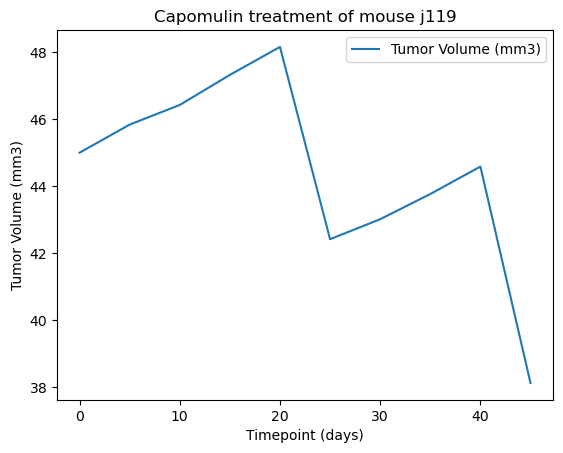

In [56]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_data[clean_data["Drug Regimen"] == 'Capomulin']
j119_df = clean_data[clean_data["Mouse ID"] == 'j119']

j119_df.plot(x = "Timepoint", y = "Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse j119")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

C:\Users\rebek\AppData\Local\Temp\ipykernel_24720\2301739102.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_weight = capomulin_df.groupby(["Mouse ID"]).mean()["Weight (g)"].values
C:\Users\rebek\AppData\Local\Temp\ipykernel_24720\2301739102.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"].values


Text(0, 0.5, 'Average Tumor Volume (mm3)')

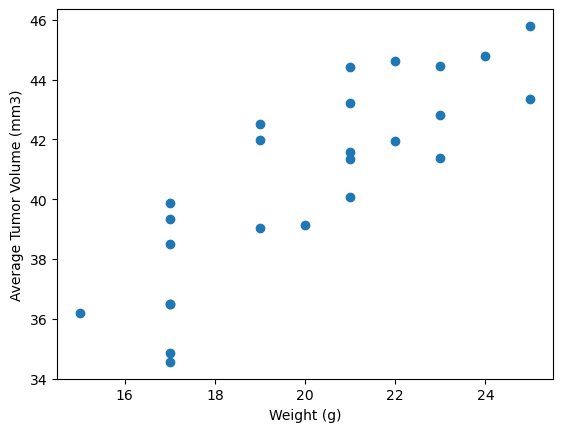

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_df.groupby(["Mouse ID"]).mean()["Weight (g)"].values

tumor_mean = capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"].values

plt.scatter(mouse_weight, tumor_mean)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The Correlation between mouse weight and the average tumor valume is 0.84


C:\Users\rebek\AppData\Local\Temp\ipykernel_24720\2518418758.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_weight = capomulin_df.groupby(["Mouse ID"]).mean()["Weight (g)"].values
C:\Users\rebek\AppData\Local\Temp\ipykernel_24720\2518418758.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"].values


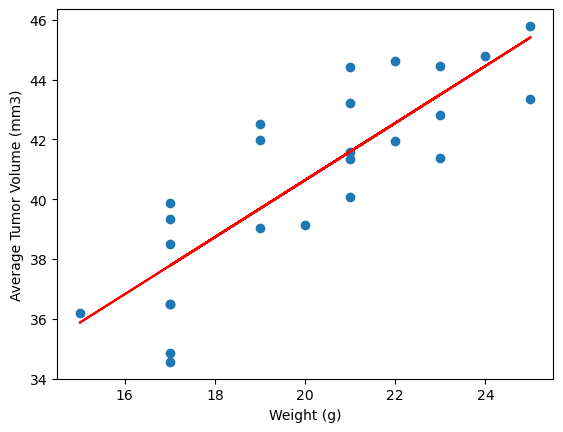

In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

mouse_weight = capomulin_df.groupby(["Mouse ID"]).mean()["Weight (g)"].values

tumor_mean = capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"].values

print(f"The Correlation between mouse weight and the average tumor valume is {round(st.pearsonr(mouse_weight, tumor_mean)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_mean)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, tumor_mean)
plt.plot(mouse_weight, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
